In [1]:
# Calculate efflux-reflux between two cross-sections
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gsw
import cmocean
import Functions as fun
import os, sys

In [2]:
# Input file info
#path1 = '/work/oceans/wbao/MITgcm_results/jorgemontt/Qsg150_wind'
path1 = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_wind/'
path2 = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_rep_wind/'

taum1 = np.array([-0.2, -0.1, 0, 0.1, 0.2, -0.3, -0.4, 0.3, 0.4, -0.8, 0.8, -1.5, 1.5]) # maximum wind stress (single event)
taum2 = np.array([-0.2, -0.1, 0.1, 0.2, -0.3, -0.4, 0.3, 0.4, -0.8, 0.8]) # maximum wind stress (repeated events)

xrange = np.array([0,97]) # X index range for the segment between glacier and outer sill
xsill = 95
x1, x2 = 60, 70 # Inner sill
x3, x4 = 90, 100 # Outer sill
# Indexes for down-/up-fjord wind
down_case1 = [3,4,5,8,9,11,13]
up_case1 = [2,1,6,7,10,12]

down_case2 = [3,4,7,8,10]
up_case2 = [2,1,5,6,9]

In [3]:
# No-wind case
dist, depth, time, temp, sal, den, u, w = fun.along_fjord_state(path1,3)

Text(7, 29, 'Glacier')

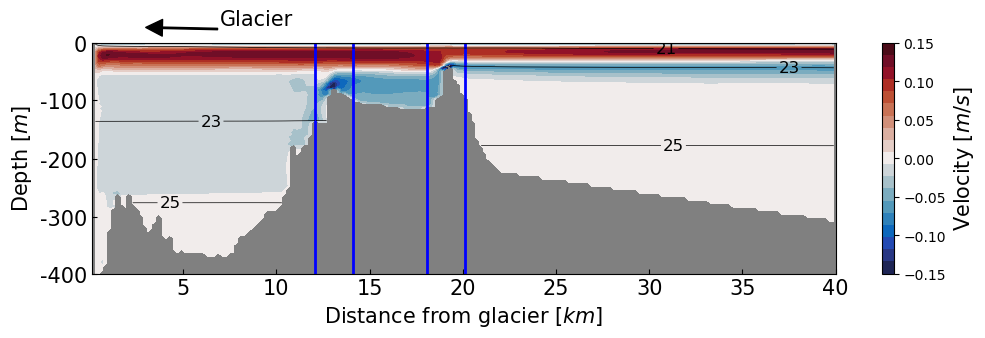

In [5]:
# Show the location of segments
# Plot along-fjord velocity, temperature, and salinity
fig0, ax = plt.subplots(1,1, figsize=(12,3))

# Time-mean (60~90d)
U, Temp, Sal, RhoA = u.mean(0), temp.mean(0), sal.mean(0), den.mean(0)-1000
mask = (temp[0,:,:] == 0)
U[mask] = np.nan
Temp[mask] = np.nan
Sal[mask] = np.nan
RhoA[mask] = np.nan

cr_u = np.linspace(-0.15,0.15,20) # Contour range
cr_t = np.linspace(4,9,20)
cr_s = np.linspace(20,32,20)
cr_rho = np.linspace(1017,1027,6)-1000

# Along-fjord velocity
im1 = ax.contourf(dist, depth, U, cr_u, cmap=cmocean.cm.balance)
# Add cross-sections
ax.axvline(x=dist[x1], color='b',lw=2)
ax.axvline(x=dist[x2], color='b',lw=2)
ax.axvline(x=dist[x3], color='b',lw=2)
ax.axvline(x=dist[x4], color='b',lw=2)
#ax1.axhline(y=-50, color='b',lw=2)
CS1 = ax.contour(dist, depth,RhoA,cr_rho, colors='k', linewidths=.5)
plt.clabel(CS1, fontsize=12, inline=1)

cbar1 = fig0.colorbar(im1,ax=ax)
cbar1.set_ticks([-0.15, -0.1,-0.05,0,0.05,0.1,0.15])
cbar1.set_label('Velocity [$m/s$]', size=15)

ax.set_facecolor('grey')
ax.tick_params(direction='in', labelsize=15)
#ax1.xaxis.set_visible(False)
ax.set_xlim([dist[0],40])
# ax1.set_xticks([X[0], 10, 20, 30, X[-1]])
ax.set_yticks([depth[0], -100, -200, -300, depth[-1]])
ax.set_yticklabels(["0","-100","-200","-300","-400"])
ax.set_ylabel('Depth [$m$]', size=15)
ax.set_xlabel('Distance from glacier [$km$]', size=15)
#ax1.set_title(r'(a)', loc='left', size=15, weight='bold')
ax.annotate('Glacier', xy=(3,25), xytext=(7,29), 
            xycoords='data', arrowprops=dict(facecolor='black',width=1), fontsize=15, annotation_clip=False)


## TEF and Efflux-Reflux

In [ ]:
# TEF transports at each cross-section
caseid = 13
#qin1, qout1, sin1, sout1 = fun.tef_transport(path1,caseid,x1)
#qin2, qout2, sin2, sout2 = fun.tef_transport(path1,caseid,x2)
qin3, qout3, sin3, sout3 = fun.tef_transport(path1,caseid,x3)
qin4, qout4, sin4, sout4 = fun.tef_transport(path1,caseid,x4)


In [ ]:
#qin1[:25], qout1[:25]
len(time), time[-121]/86400
#Q = fun.filt_godin(qin1)
#Q[-121:]

In [ ]:
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
not_nan = ~np.isnan(sout4)
L = np.arange(len(sout4))

# Linear Interpolation
linear_interpolator = interp1d(L[not_nan], sout4[not_nan], kind='linear', bounds_error=False)
linear_interpolated = linear_interpolator(np.arange(len(sout4)))

# Spline Interpolation
spline_interpolator = InterpolatedUnivariateSpline(L[not_nan], sout4[not_nan])
spline_interpolated = spline_interpolator(np.arange(len(sout4)))


# Nearest Interpolation
nearest_interpolator = interp1d(L[not_nan], sout4[not_nan], kind='nearest', fill_value="extrapolate")
nearest_interpolated = nearest_interpolator(np.arange(len(sout4)))

In [ ]:
#%matplotlib widget
%matplotlib inline
fig1 = plt.figure(figsize=(8,3), tight_layout=True)    
ax1 = fig1.add_subplot(111)


plt.grid(linestyle = '--', linewidth = 0.5)

#ax1.plot(time/86400,sout3,lw=2,label=r'Sout3')
ax1.plot(time/86400,sout4,lw=2,label=r'Sout4')
#ax1.plot(time/86400,linear_interpolated,lw=2,label=r'Linear')
#ax1.plot(time/86400,spline_interpolated,lw=2,label=r'Spline')
ax1.plot(time/86400,nearest_interpolated,lw=2,label=r'Nearest')

ax1.legend(loc='upper right',fontsize=12)
ax1.set(xlim=(60, 90), ylim=(27, 30))
ax1.tick_params(direction='in', labelsize=12)
ax1.set_xlabel('Days',fontsize=12)
ax1.set_ylabel(r'$S_{out}$',fontsize=12)


In [ ]:
# Linear Interpolation
from scipy.interpolate import interp1d
not_nan1 = ~np.isnan(sout4)
L = np.arange(len(sout4))
fun_interp1 = interp1d(L[not_nan1], sout4[not_nan1], kind='linear', bounds_error=False)
sout4_interp = fun_interp1(np.arange(len(sout4)))

not_nan2 = ~np.isnan(sin4)
fun_interp2 = interp1d(L[not_nan2], sin4[not_nan2], kind='linear', bounds_error=False)
sin4_interp = fun_interp2(np.arange(len(sin4)))

In [ ]:
# Average over the last 5 days of simulation
tt = -121 # starting time

# # Segment 1 (Inner sill)
# Qin1 = [np.nanmean(fun.filt_godin(qin1)[tt:]), np.nanmean(fun.filt_godin(qin2)[tt:])]
# Qout1 = [np.nanmean(fun.filt_godin(qout1)[tt:]), np.nanmean(fun.filt_godin(qout2)[tt:])]
# Sin1 = [np.nanmean(fun.filt_godin(sin1)[tt:]), np.nanmean(fun.filt_godin(sin2)[tt:])]
# Sout1 = [np.nanmean(fun.filt_godin(sout1)[tt:]), np.nanmean(fun.filt_godin(sout2)[tt:])]

# Segment 2 (Outer sill)
Qin2 = [np.nanmean(fun.filt_godin(qin3)[tt:]), np.nanmean(fun.filt_godin(qin4)[tt:])]
Qout2 = [np.nanmean(fun.filt_godin(qout3)[tt:]), np.nanmean(fun.filt_godin(qout4)[tt:])]
Sin2 = [np.nanmean(fun.filt_godin(sin3)[tt:]), np.nanmean(fun.filt_godin(sin4_interp)[tt:])]
Sout2 = [np.nanmean(fun.filt_godin(sout3)[tt:]), np.nanmean(fun.filt_godin(sout4_interp)[tt:])]

In [ ]:
# a11, a01, a10, a00
#alpha1 = fun.efflux_reflux(Qin1, Qout1, Sin1, Sout1, error=True)
alpha2 = fun.efflux_reflux(Qin2, Qout2, Sin2, Sout2, error=True)

In [ ]:
alpha2, alpha2[0][-1]*alpha2[1], alpha2[1]-alpha2[2]

In [6]:
Tau = [0, 0.1, 0.2, 0.3, 0.4, 0.8, 1.5]
a11 = [-0.126, -0.126, -0.125, -0.126, -0.127, -0.132, 0.006]
a00 = [0.218, 0.218, 0.223, 0.226, 0.231, 0.252, 0.368]
Qe = [1737, 1747, 1793, 1826, 1883, 2102, 3106]

Text(0, 0.5, 'Downward reflux $[m^3\\,s^{-1}]$')

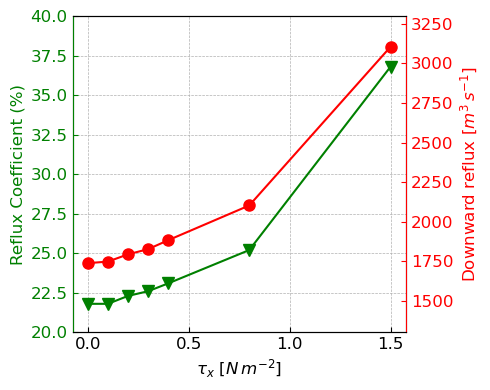

In [27]:
fig2 = plt.figure(figsize=(5,4), tight_layout=True)    

ax1 = fig2.add_subplot(111)
#plt.axis('square')
plt.grid(linestyle = '--', linewidth = 0.5)
ax1.plot(Tau,[alpha * 100 for alpha in a00],'v-g',ms=8,label=r'$\alpha_{11}$')
# #eflx[eflx<0] = 0
# ax3.plot(hsr,a22,'^-g',ms=10,label=r'$\alpha_{22}$')
#ax1.legend(bbox_to_anchor=(.65,.75), fontsize=15)
#ax1.set(xlim=(0, 2), ylim=(0.2,0.4))
ax1.set(ylim=(20,40))
ax1.tick_params(direction='in', labelsize=12)
ax1.tick_params(axis='y', colors='green')

#ax3.set_xticks([0.04, 0.06, 0.08, 0.10, 0.12])
ax1.set_xlabel(r"$\tau_x$ [$N\,m^{-2}$]",fontsize=12)
ax1.set_ylabel(r"Reflux Coefficient (%)",fontsize=12,color='g')
#ax3.set_title('(b)', loc='left', size=15, weight='bold')

ax2=ax1.twinx()
ax2.plot(Tau,Qe,'o-r',ms=8,label=r'$Q_r$')
ax2.set(ylim=(1300,3300))
#ax4.legend(loc='right', fontsize=15)
ax2.tick_params(direction='in', labelsize=12)
ax2.spines['left'].set_color('green')
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
#ax4.set_ylim([1, 9])
#ax4.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax2.set_ylabel(r"Downward reflux $[m^3\,s^{-1}]$",fontsize=12,color='r')